# Finite-Length Performance on the BEC Channel

This code is provided as supplementary material of the lecture Channel Coding 2 - Advanced Methods.

This code illustrates
* Calculating an upper and lower bound on the error rate of codes on the BEC

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [13]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=matplotlib.checkdep_usetex(True))

matplotlib.rc('figure', figsize=(18, 6) )

### Binary Erasure Channel (BEC)

For the BEC, we have the capacity
\begin{equation*}
C_\text{BEC} = 1 - \epsilon
\end{equation*}

In [14]:
# capacity of the BSC
def C_BEC(epsilon):    
    return 1 - epsilon

### Random Coding Union Bound for the BEC
We now additionally show the Random Coding Union (RCU) bound [2, Th. 16] for the BEC, as it is a fairly easy to calculate the bound in this case. The RCU bound is not part of the lecture and shown here for completeness. 

To get the RCU bound, we assume that we perform ML decoding of the random code with $\boldsymbol{x}^{[1]}$ transmitted. We assume that the channel introduces a total number of $t$ erasures. At the non-erased positions, the bits have been received correctly. Then let $E_m$ denote the event that codeword $\boldsymbol{x}^{[m]}$ has the same code bits at the __non__-erased positions as $\boldsymbol{x}^{[1]}$. In this case, the decoder cannot make a decision which codeword to select (they have the same likelihood). It can resolve this tie by randomly selecting a codeword, which may produce a decoding error. Hence, the error probability can be bounded as
\begin{align*}
P(\text{decoding error} | \boldsymbol{Y}, t\text{ erasures}) &\leq P\left(\bigcup_{m=2}^M E_m | \boldsymbol{Y}, t\text{ erasures}\right) \\
&\stackrel{(a)}{\leq} \sum_{m=2}^M P\left(E_m | \boldsymbol{Y}, t\text{ erasures}\right) \\
&= (M-1)\cdot P\left(E_2 | \boldsymbol{Y}, t\text{ erasures}\right) \\
&\leq M\cdot P\left(E_2 | \boldsymbol{Y}, t\text{ erasures}\right) \\
&\stackrel{(b)}{=} M\left(\frac{1}{2}\right)^{n-t} \\
&= 2^{-n(1-r)+t}
\end{align*}
where $(a)$ is the union bound and $(b)$ is due to the fact that the probability of choosing $n-t$ positions that are identical to $\boldsymbol{x}^{[1]}$ in these positions is $(\frac12)^{n-t} = 2^{t-n}$.

The main trick of [2] is now to observe that the union bound can be often loose and $2^{-n(1-r)+t}$ can become larger than 1. Hence, [2] introduced the tighter bound
\begin{equation*}
P(\text{decoding error} | \boldsymbol{Y}, t\text{ erasures}) \leq \min\left(1, 2^{-n(1-r)+t}\right) 
\end{equation*}

The total probability of error is then obtained by noticing that the erasures in the BEC follow a binomial distribution, and we we can state that
\begin{align*}
P_e &= \sum_{t=0}^n\binom{n}{t}\epsilon^t(1-\epsilon)^{n-t}P(\text{decoding error} | \boldsymbol{Y}, t\text{ erasures}) \\
&\leq \sum_{t=0}^n\binom{n}{t}\epsilon^t(1-\epsilon)^{n-t} \min\left(1, 2^{-n(1-r)+t}\right) 
\end{align*}
The bound states that for the BEC with erasure probability $\epsilon$, there exists a code (the random code) with $M$ codewords of length $n$ (and rate $r = \frac{\log_2(M)}{n}$) that has an error probability upper bounded by the above bound under ML decoding.

[2] Y. Polyanskiy, H. V. Poor and S. Verdú, "Channel coding rate in the finite blocklength regime," _IEEE Trans. Inf. Theory_ , vol. 56, no. 5, pp. 2307-2359, May 2010

In [15]:
from scipy.special import comb

def get_Pe_RCU_BEC(n, r, epsilon):
       return np.sum([comb(n,t,exact=True) * (epsilon**t) * ((1-epsilon)**(n-t)) * min(1,  2**(-n*(1-r)+t))  for t in range(n+1)])

### Singleton Bound for the BEC
In order to get an upper bound on the decoding performance, we ask the question, what would be the error rate of the ___best possible code___?		
The number of erasures that a code can correct is $d_{\min}-1$. We know from the ___Singleton bound___ that $d_{\min} \leq n-k+1$, i.e., the best possible code can correct at most $n-k = n(1-r)$ erasures.

Hence, the probability of error of \schlagwort{any} code, is always higher than the probability of error of the ___best___ code. We have
$$
	P_e \geq \sum_{t=n(1-r)+1}^n\binom{n}{t}\epsilon^t(1-\epsilon)^{n-t} = 1-\sum_{t=0}^{n(1-r)}\binom{n}{t}\epsilon^t(1-\epsilon)^{n-t}
$$

In [23]:
def get_Pe_Singleton_BEC(n, r, epsilon):
    return 1.0 - np.sum([comb(n,t,exact=True) * (epsilon**t) * ((1-epsilon)**(n-t)) for t in range(int(np.ceil(n*(1-r)))+1)])
    #return np.sum([comb(n,t,exact=True) * (epsilon**t) * ((1-epsilon)**(n-t)) for t in range(int(np.ceil(n*(1-r)+1)),n+1)])

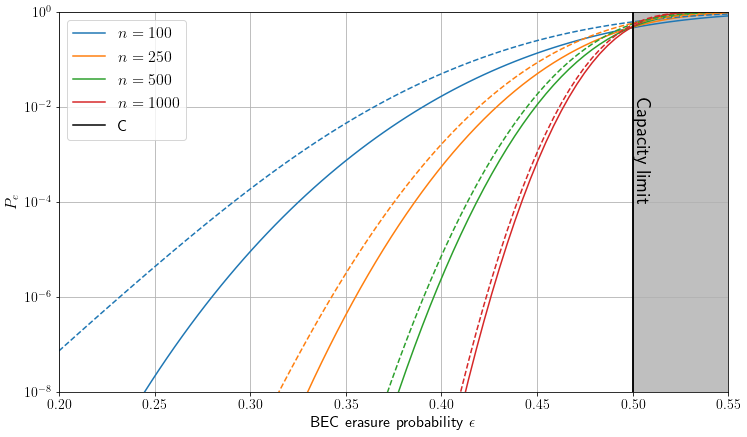

In [24]:
epsilon_range = np.linspace(0.2,0.6,100)




Pe_RCU_BEC_r12_n100 = [get_Pe_RCU_BEC(100, 0.5, epsilon) for epsilon in epsilon_range]
Pe_RCU_BEC_r12_n250 = [get_Pe_RCU_BEC(250, 0.5, epsilon) for epsilon in epsilon_range]
Pe_RCU_BEC_r12_n500 = [get_Pe_RCU_BEC(500, 0.5, epsilon) for epsilon in epsilon_range]
Pe_RCU_BEC_r12_n1000 = [get_Pe_RCU_BEC(1000, 0.5, epsilon) for epsilon in epsilon_range]

Pe_Singleton_BEC_r12_n100 = [get_Pe_Singleton_BEC(100, 0.5, epsilon) for epsilon in epsilon_range]
Pe_Singleton_BEC_r12_n250 = [get_Pe_Singleton_BEC(250, 0.5, epsilon) for epsilon in epsilon_range]
Pe_Singleton_BEC_r12_n500 = [get_Pe_Singleton_BEC(500, 0.5, epsilon) for epsilon in epsilon_range]
Pe_Singleton_BEC_r12_n1000 = [get_Pe_Singleton_BEC(1000, 0.5, epsilon) for epsilon in epsilon_range]



fig = plt.figure(1,figsize=(12,7))
plt.semilogy(epsilon_range, Pe_Singleton_BEC_r12_n100)
plt.semilogy(epsilon_range, Pe_Singleton_BEC_r12_n250)
plt.semilogy(epsilon_range, Pe_Singleton_BEC_r12_n500)
plt.semilogy(epsilon_range, Pe_Singleton_BEC_r12_n1000)
plt.axvline(x=0.5, color='k')

plt.gca().set_prop_cycle(None)
plt.semilogy(epsilon_range, Pe_RCU_BEC_r12_n100, '--')
plt.semilogy(epsilon_range, Pe_RCU_BEC_r12_n250, '--')
plt.semilogy(epsilon_range, Pe_RCU_BEC_r12_n500, '--')
plt.semilogy(epsilon_range, Pe_RCU_BEC_r12_n1000, '--')



plt.axvspan(0.5, 0.55, alpha=0.5, color='gray')
plt.axvline(x=0.5, color='k')
plt.ylim((1e-8,1))
plt.xlim((0.2,0.55))
plt.xlabel('BEC erasure probability $\epsilon$', fontsize=16)
plt.ylabel('$P_e$', fontsize=16)
plt.legend(['$n = 100$', '$n=250$','$n=500$', '$n=1000$', 'C'], fontsize=16)
plt.text(0.5, 1e-4, 'Capacity limit', {'color': 'k', 'fontsize': 20, 'rotation': -90})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.savefig('BEC_Singleton_RCU_R12.pdf',bbox_inches='tight')